# ***Titanic*** ***Survival*** ***Prediction***

# *Loading the dataset*

In [ ]:
import pandas as pd

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# *Checking the missing values*

In [5]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# *Droping useless columns*

In [6]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


# *Handle missing values*

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #Fill Age with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #Fill Embarked with most common value


# *Converting text to integer*

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) #Sex column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) #Embarked column


# *Unique Feature Engineering*
Two new features were created:
- **FamilySize**: Total number of family members traveling together.
- **IsAlone**: Indicates whether a passenger was traveling alone.

These features help capture social and survival patterns during the disaster.

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 #Create FamilySize
df['IsAlone'] = (df['FamilySize'] == 1).astype(int) #Create isalone
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


# *Exploratory Data Analysis (EDA)*
From the analysis, it was observed that:
- Female passengers had a higher survival rate than males.
- Passengers in 1st class survived more than those in 3rd class.
- Family size played a role in survival chances.

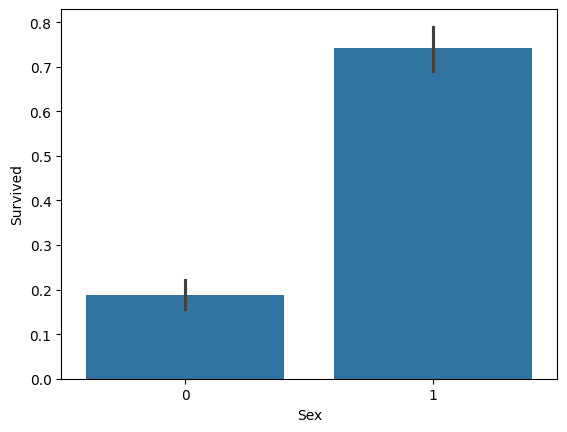

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#Survival by Class
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()


# *Splitting Data (Train/Test)*

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## *Building Models*

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# *Evaluating Model*

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

